# Alpha Sweep Experiment: Linear vs Ratio Cost

This notebook runs the RRT* planner for various values of `alpha` to compare two cost functions:
1. **Linear Cost**: $Cost = Distance - \alpha \times Plastic$
2. **Ratio Cost**: $Cost = \frac{Distance}{1 + \alpha \times Plastic}$

We also run a **Baseline** with `alpha=0` (Standard Euclidean Distance) for comparison.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import planning_lib
from planning_lib import ContinuousPlannerUtil
from run_gpgp_experiment import rrt_star_tunable

## 1. Run Baseline (Alpha=0)
First, we establish the baseline performance when minimizing only distance.

In [2]:
c = ContinuousPlannerUtil('ocean_real.png', 'summer_2002_day0_density.png', scale=0.8)

print("--- Running Baseline (Alpha=0) ---")
np.random.seed(42)
# alpha=0 means cost is just distance
L_base, P_base, ratio_base, path_base = rrt_star_tunable(c, alpha=0.0, cost_mode="linear", loops=1000, output_prefix="rrt_baseline")
print(f"Baseline Results -> Length: {L_base:.4f}, Plastic: {P_base:.4f}, Ratio: {ratio_base:.4f}")

--- Running Baseline (Alpha=0) ---
Running RRT* with alpha=0.0, mode=linear...


[Alpha 0.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.12, Total Plastic: 0.06, Ratio (L/P): 17.42


rrt_baseline_alpha_0.0_mode_linear.gif has been created.
Baseline Results -> Length: 1.1249, Plastic: 0.0646, Ratio: 17.4165


## 2. Visualize Baseline Path
Showing the standard distance minimization path.

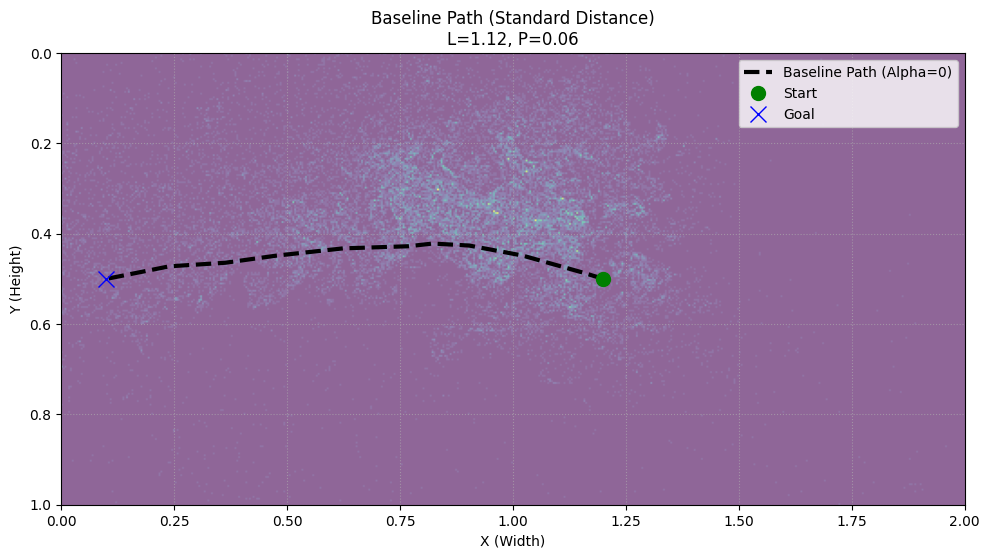

In [3]:
plt.figure(figsize=(10, 6))
img = plt.imread('summer_2002_day0_density.png')
extent = [0, 2.0, 1.0, 0.0]

plt.imshow(img, origin='upper', extent=extent, alpha=0.6)
pb = np.array(path_base)

if len(pb) > 0:
    plt.plot(pb[:, 1], pb[:, 0], color='black', linewidth=3, linestyle='--', label='Baseline Path (Alpha=0)')
    plt.plot(pb[0, 1], pb[0, 0], 'go', markersize=10, label='Start')
    plt.plot(pb[-1, 1], pb[-1, 0], 'bx', markersize=12, label='Goal')

plt.title(f"Baseline Path (Standard Distance)\nL={L_base:.2f}, P={P_base:.2f}")
plt.xlabel("X (Width)")
plt.ylabel("Y (Height)")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(0, 2.0)
plt.ylim(1.0, 0.0)

plt.tight_layout()
plt.savefig('path_baseline.png')
plt.show()

## 3. Run Alpha Sweep (Linear vs Ratio)
We sweep alpha from 1 to 125.

In [4]:
alphas_to_sweep = [1, 5, 10, 25, 50, 75, 100, 125]

# --- Linear Cost Experiment ---
linear_alphas = []
linear_lengths = []
linear_plastics = []
linear_ratios = []

print("\n--- Starting LINEAR Cost Sweep (D - alpha*P) ---")
for alpha in alphas_to_sweep:
    print(f"\n[Linear] Alpha = {alpha}")
    np.random.seed(42)
    L, P, ratio, _ = rrt_star_tunable(c, alpha=float(alpha), cost_mode="linear", loops=1000, output_prefix=f"rrt_linear_m_{alpha}")
    
    linear_alphas.append(alpha)
    linear_lengths.append(L)
    linear_plastics.append(P)
    linear_ratios.append(ratio)

# --- Ratio Cost Experiment ---
ratio_alphas = []
ratio_lengths = []
ratio_plastics = []
ratio_ratios = []

print("\n--- Starting RATIO Cost Sweep (D / (1 + alpha*P)) ---")
for alpha in alphas_to_sweep:
    print(f"\n[Ratio] Alpha = {alpha}")
    np.random.seed(42)
    L, P, ratio, _ = rrt_star_tunable(c, alpha=float(alpha), cost_mode="ratio", loops=1000, output_prefix=f"rrt_ratio_m_{alpha}")
    
    ratio_alphas.append(alpha)
    ratio_lengths.append(L)
    ratio_plastics.append(P)
    ratio_ratios.append(ratio)


--- Starting LINEAR Cost Sweep (D - alpha*P) ---

[Linear] Alpha = 1
Running RRT* with alpha=1.0, mode=linear...


[Alpha 1.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.13, Total Plastic: 0.08, Ratio (L/P): 14.67


rrt_linear_m_1_alpha_1.0_mode_linear.gif has been created.

[Linear] Alpha = 5
Running RRT* with alpha=5.0, mode=linear...


[Alpha 5.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_linear_m_5_alpha_5.0_mode_linear.gif has been created.

[Linear] Alpha = 10
Running RRT* with alpha=10.0, mode=linear...


[Alpha 10.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.27, Total Plastic: 0.51, Ratio (L/P): 8.31


rrt_linear_m_10_alpha_10.0_mode_linear.gif has been created.

[Linear] Alpha = 25
Running RRT* with alpha=25.0, mode=linear...


[Alpha 25.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 5.44, Total Plastic: 0.43, Ratio (L/P): 12.53


rrt_linear_m_25_alpha_25.0_mode_linear.gif has been created.

[Linear] Alpha = 50
Running RRT* with alpha=50.0, mode=linear...


[Alpha 50.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.89, Total Plastic: 0.12, Ratio (L/P): 16.25


rrt_linear_m_50_alpha_50.0_mode_linear.gif has been created.

[Linear] Alpha = 75
Running RRT* with alpha=75.0, mode=linear...


[Alpha 75.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.03, Total Plastic: 0.32, Ratio (L/P): 12.48


rrt_linear_m_75_alpha_75.0_mode_linear.gif has been created.

[Linear] Alpha = 100
Running RRT* with alpha=100.0, mode=linear...


[Alpha 100.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.03, Total Plastic: 0.32, Ratio (L/P): 12.48


rrt_linear_m_100_alpha_100.0_mode_linear.gif has been created.

[Linear] Alpha = 125
Running RRT* with alpha=125.0, mode=linear...


[Alpha 125.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.03, Total Plastic: 0.32, Ratio (L/P): 12.48


rrt_linear_m_125_alpha_125.0_mode_linear.gif has been created.

--- Starting RATIO Cost Sweep (D / (1 + alpha*P)) ---

[Ratio] Alpha = 1
Running RRT* with alpha=1.0, mode=ratio...


[Alpha 1.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.13, Total Plastic: 0.08, Ratio (L/P): 14.67


rrt_ratio_m_1_alpha_1.0_mode_ratio.gif has been created.

[Ratio] Alpha = 5
Running RRT* with alpha=5.0, mode=ratio...


[Alpha 5.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_ratio_m_5_alpha_5.0_mode_ratio.gif has been created.

[Ratio] Alpha = 10
Running RRT* with alpha=10.0, mode=ratio...


[Alpha 10.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.44, Total Plastic: 0.17, Ratio (L/P): 8.57


rrt_ratio_m_10_alpha_10.0_mode_ratio.gif has been created.

[Ratio] Alpha = 25
Running RRT* with alpha=25.0, mode=ratio...


[Alpha 25.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.52, Total Plastic: 0.45, Ratio (L/P): 7.87


rrt_ratio_m_25_alpha_25.0_mode_ratio.gif has been created.

[Ratio] Alpha = 50
Running RRT* with alpha=50.0, mode=ratio...


[Alpha 50.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.72, Total Plastic: 0.47, Ratio (L/P): 7.87


rrt_ratio_m_50_alpha_50.0_mode_ratio.gif has been created.

[Ratio] Alpha = 75
Running RRT* with alpha=75.0, mode=ratio...


[Alpha 75.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.93, Total Plastic: 0.46, Ratio (L/P): 8.58


rrt_ratio_m_75_alpha_75.0_mode_ratio.gif has been created.

[Ratio] Alpha = 100
Running RRT* with alpha=100.0, mode=ratio...


[Alpha 100.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.93, Total Plastic: 0.46, Ratio (L/P): 8.58


rrt_ratio_m_100_alpha_100.0_mode_ratio.gif has been created.

[Ratio] Alpha = 125
Running RRT* with alpha=125.0, mode=ratio...


[Alpha 125.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.93, Total Plastic: 0.46, Ratio (L/P): 8.58


rrt_ratio_m_125_alpha_125.0_mode_ratio.gif has been created.


## 4. Plot Metrics with Baseline
We compare the metrics against the baseline (shown as horizontal lines).

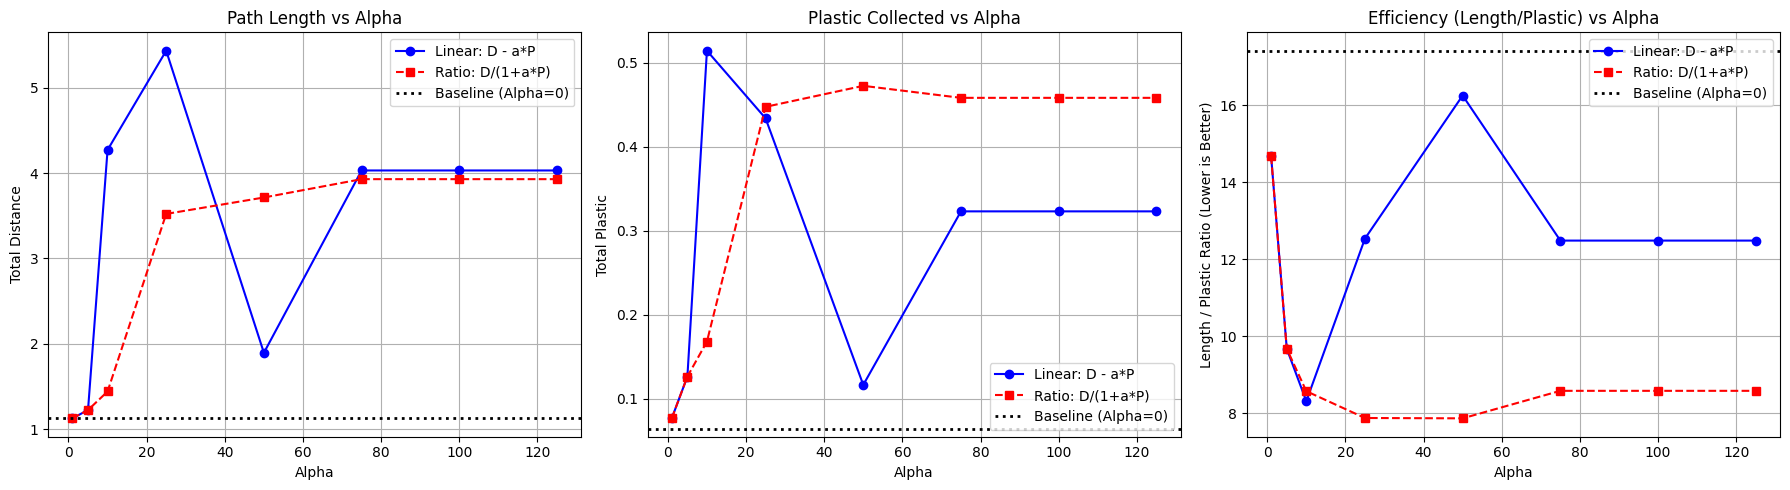

In [5]:
plt.figure(figsize=(18, 5))

# 1. Path Length Comparison
plt.subplot(1, 3, 1)
plt.plot(linear_alphas, linear_lengths, marker='o', color='blue', label='Linear: D - a*P')
plt.plot(ratio_alphas, ratio_lengths, marker='s', color='red', linestyle='--', label='Ratio: D/(1+a*P)')
plt.axhline(y=L_base, color='black', linestyle=':', linewidth=2, label='Baseline (Alpha=0)')
plt.title('Path Length vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Total Distance')
plt.legend()
plt.grid(True)

# 2. Plastic Collected Comparison
plt.subplot(1, 3, 2)
plt.plot(linear_alphas, linear_plastics, marker='o', color='blue', label='Linear: D - a*P')
plt.plot(ratio_alphas, ratio_plastics, marker='s', color='red', linestyle='--', label='Ratio: D/(1+a*P)')
plt.axhline(y=P_base, color='black', linestyle=':', linewidth=2, label='Baseline (Alpha=0)')
plt.title('Plastic Collected vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Total Plastic')
plt.legend()
plt.grid(True)

# 3. Efficiency (Distance / Plastic) Comparison
plt.subplot(1, 3, 3)
plt.plot(linear_alphas, linear_ratios, marker='o', color='blue', label='Linear: D - a*P')
plt.plot(ratio_alphas, ratio_ratios, marker='s', color='red', linestyle='--', label='Ratio: D/(1+a*P)')
plt.axhline(y=ratio_base, color='black', linestyle=':', linewidth=2, label='Baseline (Alpha=0)')
plt.title('Efficiency (Length/Plastic) vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Length / Plastic Ratio (Lower is Better)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('metrics_comparison.png')
plt.show()

## 5. Comparative Path Visualization (Alpha 5, 25, 125)


--- Generating Comparative Paths (Alpha 5, 25, 125) ---

Running Alpha 5...
Running RRT* with alpha=5.0, mode=linear...


[Alpha 5.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


path_comp_linear_5_alpha_5.0_mode_linear.gif has been created.
Running RRT* with alpha=5.0, mode=ratio...


[Alpha 5.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


path_comp_ratio_5_alpha_5.0_mode_ratio.gif has been created.

Running Alpha 25...
Running RRT* with alpha=25.0, mode=linear...


[Alpha 25.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 5.44, Total Plastic: 0.43, Ratio (L/P): 12.53


path_comp_linear_25_alpha_25.0_mode_linear.gif has been created.
Running RRT* with alpha=25.0, mode=ratio...


[Alpha 25.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.52, Total Plastic: 0.45, Ratio (L/P): 7.87


path_comp_ratio_25_alpha_25.0_mode_ratio.gif has been created.

Running Alpha 125...
Running RRT* with alpha=125.0, mode=linear...


[Alpha 125.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.03, Total Plastic: 0.32, Ratio (L/P): 12.48


path_comp_linear_125_alpha_125.0_mode_linear.gif has been created.
Running RRT* with alpha=125.0, mode=ratio...


[Alpha 125.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.93, Total Plastic: 0.46, Ratio (L/P): 8.58


path_comp_ratio_125_alpha_125.0_mode_ratio.gif has been created.


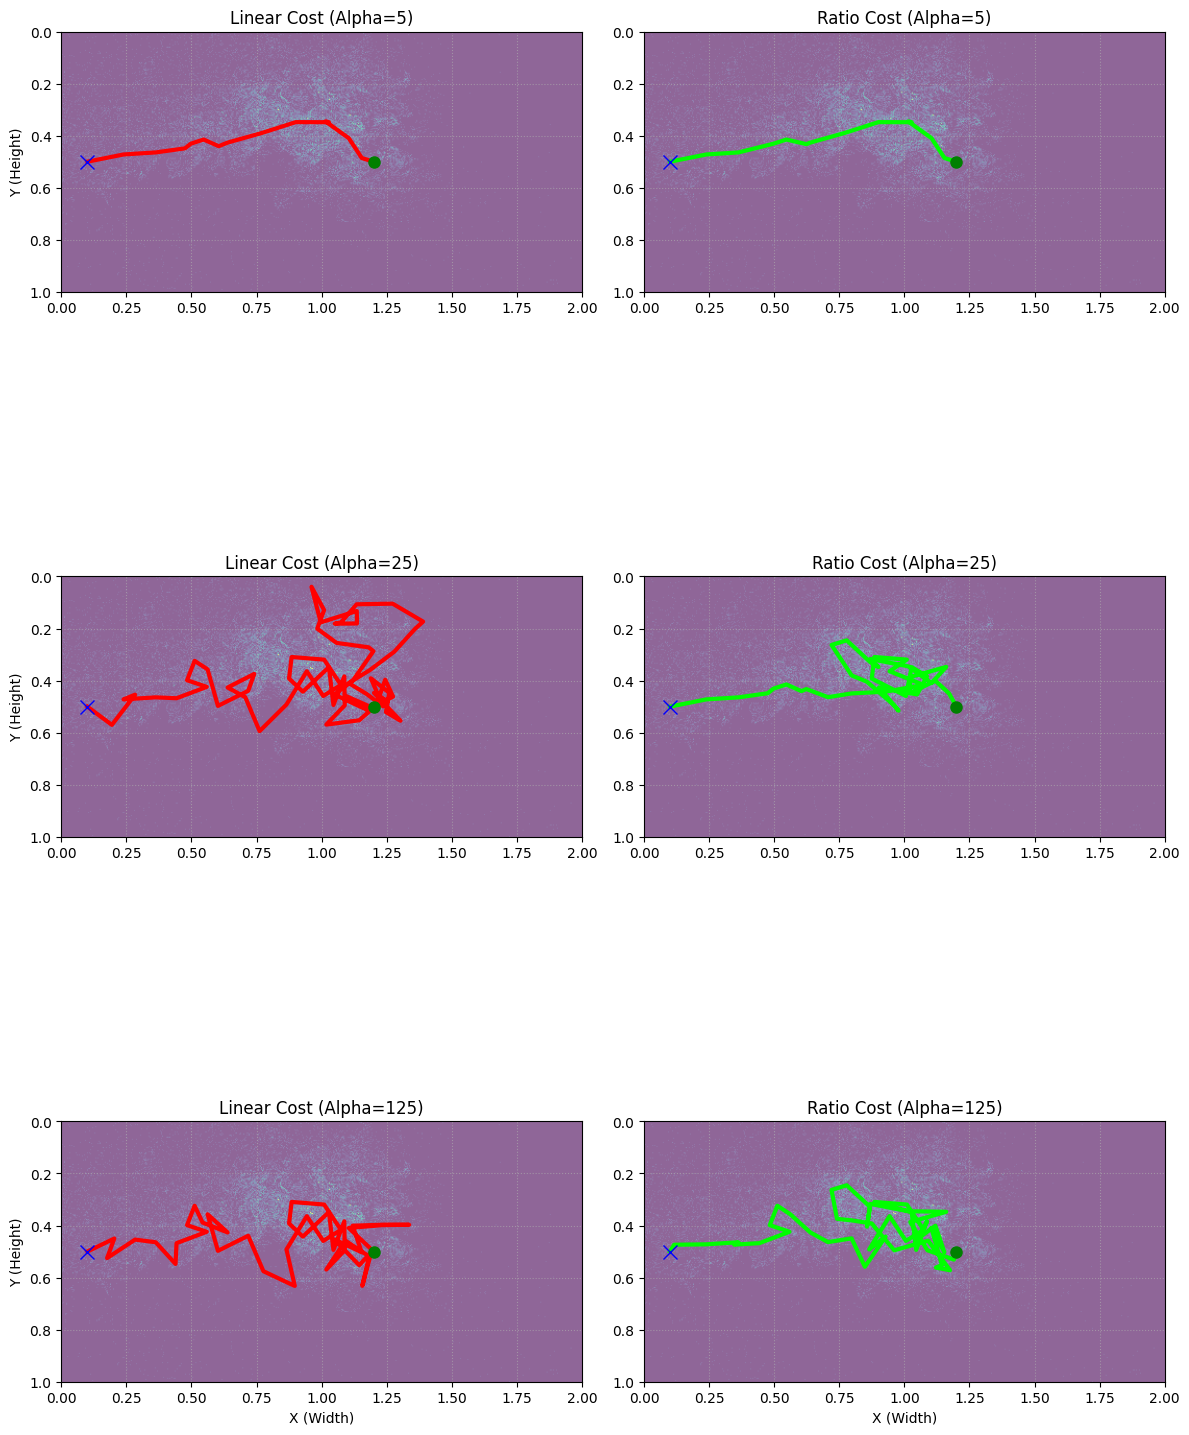

In [6]:
alphas_to_compare = [5, 25, 125]
paths_linear = {}
paths_ratio = {}

print("\n--- Generating Comparative Paths (Alpha 5, 25, 125) ---")
for alpha in alphas_to_compare:
    print(f"\nRunning Alpha {alpha}...")
    
    # Linear
    np.random.seed(42)
    _, _, _, p_linear = rrt_star_tunable(c, alpha=float(alpha), cost_mode="linear", loops=1000, output_prefix=f"path_comp_linear_{alpha}")
    paths_linear[alpha] = p_linear
    
    # Ratio
    np.random.seed(42)
    _, _, _, p_ratio = rrt_star_tunable(c, alpha=float(alpha), cost_mode="ratio", loops=1000, output_prefix=f"path_comp_ratio_{alpha}")
    paths_ratio[alpha] = p_ratio

# Plotting Side-by-Side Comparison
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
# Load background
img = plt.imread('summer_2002_day0_density.png')
extent = [0, 2.0, 1.0, 0.0]

for i, alpha in enumerate(alphas_to_compare):
    # Row i, Col 0: LINEAR
    ax_lin = axes[i, 0]
    ax_lin.imshow(img, origin='upper', extent=extent, alpha=0.6)
    pl = np.array(paths_linear[alpha])
    if len(pl) > 0:
        # Plot X (col 1) on X-axis, Y (col 0) on Y-axis
        ax_lin.plot(pl[:, 1], pl[:, 0], color='red', linewidth=3)
        # Mark Start/End
        ax_lin.plot(pl[0, 1], pl[0, 0], 'go', markersize=8) # Start
        ax_lin.plot(pl[-1, 1], pl[-1, 0], 'bx', markersize=10) # End
    ax_lin.set_title(f"Linear Cost (Alpha={alpha})")
    ax_lin.set_ylabel("Y (Height)")
    if i == 2: ax_lin.set_xlabel("X (Width)")
    ax_lin.grid(True, linestyle=':', alpha=0.6)

    # Row i, Col 1: RATIO
    ax_rat = axes[i, 1]
    ax_rat.imshow(img, origin='upper', extent=extent, alpha=0.6)
    pr = np.array(paths_ratio[alpha])
    if len(pr) > 0:
        ax_rat.plot(pr[:, 1], pr[:, 0], color='lime', linewidth=3)
        # Mark Start/End
        ax_rat.plot(pr[0, 1], pr[0, 0], 'go', markersize=8)
        ax_rat.plot(pr[-1, 1], pr[-1, 0], 'bx', markersize=10)
    ax_rat.set_title(f"Ratio Cost (Alpha={alpha})")
    if i == 2: ax_rat.set_xlabel("X (Width)")
    ax_rat.grid(True, linestyle=':', alpha=0.6)

# Ensure axis limits cover the goal if it goes outside image
for ax in axes.flat:
    ax.set_xlim(0, 2.0)
    ax.set_ylim(1.0, 0.0)

plt.tight_layout()
plt.savefig('path_comparison_grid.png')
plt.show()